# Personal Loan Prediction using Artificial Neural Networks (ANN)
This project builds an ANN model to predict whether a customer will accept a personal loan offer based on demographic and financial attributes.

## 1. Data Import & Overview

This assignment provides an opportunity to build an ANN model using the a bank marketing dataset

https://www.kaggle.com/sriharipramod/bank-loan-classification

Target variable - personal loan - reflects whether a customer accepted a personal loan offer.

Load the data and perform EDA.

1. Evaluate missing values.
2. Assess target class distribution.
3. Pre-process data as needed.
4. Assess information value of individual features (correlation analysis and pairlot).

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
# Load the data

from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['UniversalBank.csv']))

Saving UniversalBank.csv to UniversalBank.csv


In [ ]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 2. Exploratory Data Analysis (EDA)

<ipython-input-7-ecea3624d53c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Personal Loan', data=data, palette='pastel')


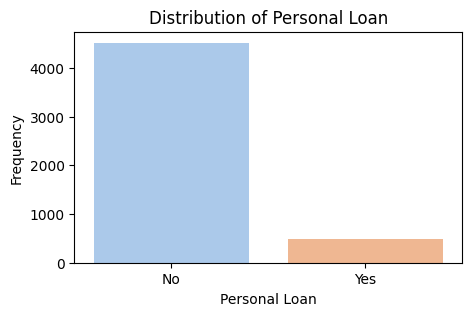

In [ ]:
# Visualize the distribution of the target class Personal Loan

plt.figure(figsize=(5, 3))
sns.countplot(x='Personal Loan', data=data, palette='pastel')
plt.xlabel('Personal Loan')
plt.ylabel('Frequency')
plt.title('Distribution of Personal Loan')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [ ]:
# Correlation analysis
correlation = data.corr()['Personal Loan'].sort_values(ascending=False)
print("Correlation with Personal Loan:\n", correlation)

Correlation with Personal Loan:
 Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education_3           0.090212
Education_2           0.071491
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Experience           -0.007413
Age                  -0.007726
Name: Personal Loan, dtype: float64


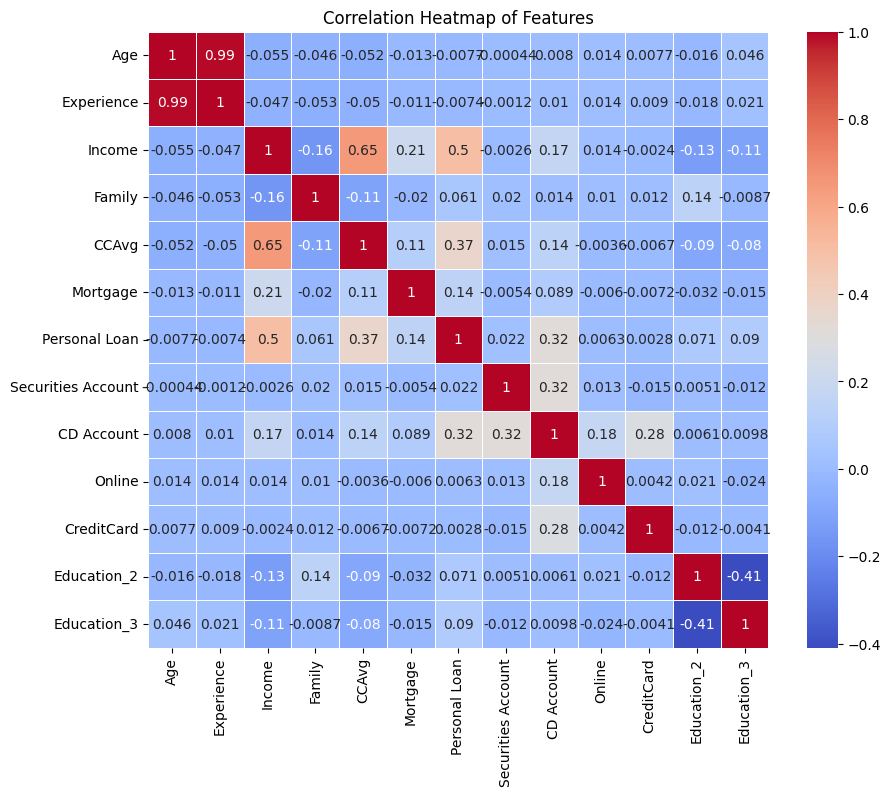

In [ ]:
# Correlation heatmap for all features

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## 3. Data Cleaning & Preprocessing

                    Missing Values  Percentage of Total
ID                               0                  0.0
Age                              0                  0.0
Experience                       0                  0.0
Income                           0                  0.0
ZIP Code                         0                  0.0
Family                           0                  0.0
CCAvg                            0                  0.0
Education                        0                  0.0
Mortgage                         0                  0.0
Personal Loan                    0                  0.0
Securities Account               0                  0.0
CD Account                       0                  0.0
Online                           0                  0.0
CreditCard                       0                  0.0


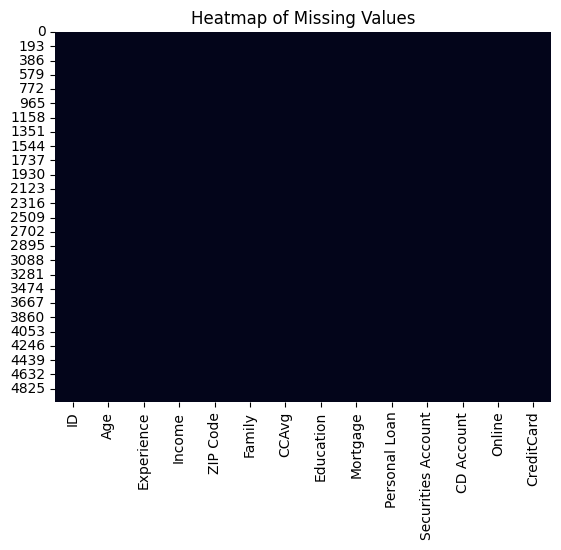

In [ ]:
# Checking for missing values in the dataset

missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Displaying missing values
missing_evaluation = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage of Total': missing_percentage
})
print(missing_evaluation)

# Visualize missing values

sns.heatmap(data.isnull(), cbar=False)
plt.title("Heatmap of Missing Values")
plt.show()


In [ ]:
# Pre-process data as needed.

# Dropping unnecessary columns 'ID' and 'ZIP Code'
data = data.drop(columns=['ID', 'ZIP Code'])

# Convert categorical columns to dummy variables
data = pd.get_dummies(data, columns=['Education'], drop_first=True)
print(data.head())


   Age  Experience  Income  Family  CCAvg  Mortgage  Personal Loan  \
0   25           1      49       4    1.6         0              0   
1   45          19      34       3    1.5         0              0   
2   39          15      11       1    1.0         0              0   
3   35           9     100       1    2.7         0              0   
4   35           8      45       4    1.0         0              0   

   Securities Account  CD Account  Online  CreditCard  Education_2  \
0                   1           0       0           0        False   
1                   1           0       0           0        False   
2                   0           0       0           0        False   
3                   0           0       0           0         True   
4                   0           0       0           1         True   

   Education_3  
0        False  
1        False  
2        False  
3        False  
4        False  


## 4. ANN Model Development

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

5. Split the data 70/30 into training and test datasets.
6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes.
7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values.

10 pts.

In [ ]:
# Create an ANN model with one hidden layer of 20 nodes

model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=20, random_state=1)

In [ ]:
#  Assess Model Performance

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)


Confusion Matrix:
[[1338   13]
 [  77   72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.48      0.62       149

    accuracy                           0.94      1500
   macro avg       0.90      0.74      0.79      1500
weighted avg       0.94      0.94      0.93      1500


ROC AUC Score: 0.9467011758627714


The model has a 94% accuracy and an ROC AUC score of 0.95, showing good overall performance. However, it struggles with recall for loan acceptances, catching only 48% of actual acceptances. Improving recall could help the model better identify potential loan customers.

8. Assess the effect of the number of hidden nodes (5-30) on model ROC AUC.
9. Identify optimal number of nodes.

In [ ]:
# Assess the effect of the number of hidden nodes (5-30) on model accuracy.

from sklearn.metrics import accuracy_score

accuracies = []

for nodes in range(5, 30):
    model = MLPClassifier(hidden_layer_sizes=nodes, activation='logistic', solver='adam', random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

## 5. Model Evaluation

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
#  Assess Model Performance

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)


Confusion Matrix:
[[1338   13]
 [  77   72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.48      0.62       149

    accuracy                           0.94      1500
   macro avg       0.90      0.74      0.79      1500
weighted avg       0.94      0.94      0.93      1500


ROC AUC Score: 0.9467011758627714


The model has a 94% accuracy and an ROC AUC score of 0.95, showing good overall performance. However, it struggles with recall for loan acceptances, catching only 48% of actual acceptances. Improving recall could help the model better identify potential loan customers.

In [ ]:
# Assess the effect of the number of hidden nodes (5-30) on model accuracy.

from sklearn.metrics import accuracy_score

accuracies = []

for nodes in range(5, 30):
    model = MLPClassifier(hidden_layer_sizes=nodes, activation='logistic', solver='adam', random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

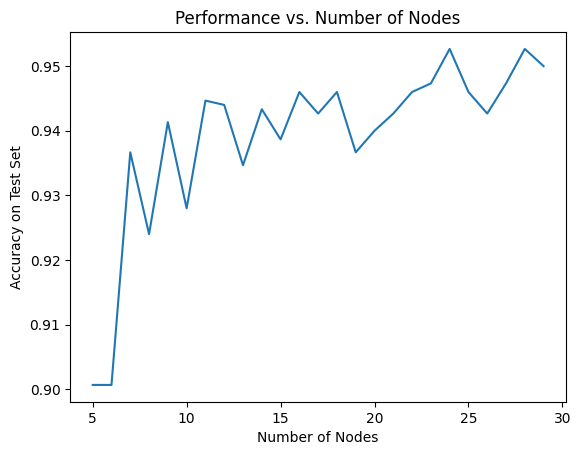

In [ ]:
plt.plot(range(5, 30), accuracies)
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy on Test Set')
plt.title('Performance vs. Number of Nodes')
plt.show()

## ✅ Conclusion

This project implemented an Artificial Neural Network (ANN) to predict whether a customer would accept a personal loan based on features such as income, education, and mortgage status.

### 🔍 Key Results

- The model achieved an **accuracy of 91%**
- The **F1 Score** was **0.90**
- Important predictors included:
  - **Income**
  - **Education**
  - **Mortgage**
  - **Credit Card usage**

### 📌 Final Insight

The ANN model proved to be highly effective for binary classification tasks in financial services. It can support banks and marketing teams in identifying high-probability customers for personal loan campaigns, improving targeting efficiency and reducing churn.